<b><font size="6">Predictive Modelling Pipeline Template</font></b><br><br>

In this notebook we present to you the main steps you should follow throughout your project.


<b> Important: The numbered sections and subsections are merely indicative of some of the steps you should pay attention to in your project. <br>You are not required to strictly follow this order or to execute everything in separate cells.</b>
    
<img src="image/process_ML.png" style="height:70px">

In [3]:
#import libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
import os


<a class="anchor" id="">

# 1. Import data (Data Integration)

</a>


<img src="image/step1.png" style="height:60px">

In [6]:
train_data = pd.read_csv('../data/obesity_train.csv')
test_data = pd.read_csv('../data/obesity_test.csv')


# Usa display per mostrare il DataFrame intero senza troncamenti
display(train_data)

train_data.obese_level.value_counts()


,id,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,marrital_status,meals_perday,...,parent_overweight,physical_activity_perweek,region,siblings,smoke,transportation,veggies_freq,water_daily,weight,obese_level
0,1,21.0,Never,no,up to 5,Sometimes,Female,1.62,NaN,3.0,...,yes,NaN,LatAm,3.0,no,Public,Sometimes,1 to 2,64.0,Normal_Weight
1,2,23.0,Frequently,no,up to 5,Sometimes,Male,1.80,NaN,3.0,...,yes,3 to 4,LatAm,0.0,no,Public,Sometimes,1 to 2,77.0,Normal_Weight
2,3,NaN,Frequently,no,up to 2,Sometimes,Male,1.80,NaN,3.0,...,no,3 to 4,LatAm,2.0,no,Walk,Always,1 to 2,87.0,Overweight_Level_I
3,4,22.0,Sometimes,no,up to 2,Sometimes,Male,1.78,NaN,1.0,...,no,NaN,LatAm,3.0,no,Public,Sometimes,1 to 2,90.0,Overweight_Level_II
4,5,22.0,Sometimes,no,up to 2,Sometimes,Male,1.64,NaN,3.0,...,no,5 or more,LatAm,3.0,no,Public,Sometimes,1 to 2,53.0,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606,1607,21.0,Sometimes,NaN,up to 5,Sometimes,Female,1.73,NaN,3.0,...,yes,3 to 4,LatAm,1.0,no,Public,Always,1 to 2,131.0,Obesity_Type_III
1607,1608,22.0,Sometimes,yes,up to 5,Sometimes,Female,1.75,NaN,3.0,...,yes,1 to 2,LatAm,0.0,no,NaN,Always,1 to 2,134.0,Obesity_Type_III
1608,1609,23.0,Sometimes,yes,up to 5,Sometimes,Female,1.75,NaN,3.0,...,yes,1 to 2,LatAm,0.0,no,Public,Always,1 to 2,134.0,Obesity_Type_III
1609,1610,24.0,Sometimes,yes,up to 5,Sometimes,Female,1.74,NaN,3.0,...,yes,1 to 2,LatAm,0.0,no,Public,Always,more than 2,133.0,Obesity_Type_III


obese_level
Obesity_Type_I         269
Obesity_Type_III       240
Obesity_Type_II        232
Overweight_Level_II    226
Overweight_Level_I     225
Normal_Weight          222
Insufficient_Weight    197
Name: count, dtype: int64

<a class="anchor" id="">

# 2. Explore data (Data access, exploration and understanding)

</a>

<img src="image/step2.png" style="height:60px">

Remember, this step is very important as it is at this stage that you will really look into the data that you have. Generally speaking, if you do well at this stage, the following stages will be very smooth.

Moreover, you should also take the time to find meaningful patterns on the data: what interesting relationships can be found between the variables and how can that knowledge be inform your future decisions. 

C:\Users\User\AppData\Local\Temp\ipykernel_7452\2065184635.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['physical_activity_perweek'].fillna(0, inplace=True)


Descriptive statistics for numerical variables:
               age       height       weight  meals_perday     siblings
count  1545.000000  1597.000000  1558.000000   1602.000000  1599.000000
mean     24.344984     1.704108    86.956354      2.684145     1.500938
std       6.474498     0.095567    26.072339      0.817584     1.132562
min       6.000000     1.290000    32.000000      1.000000     0.000000
25%      20.000000     1.630000    67.000000      3.000000     0.000000
50%      23.000000     1.700000    83.000000      3.000000     2.000000
75%      26.000000     1.770000   107.000000      3.000000     3.000000
max      88.000000     2.190000   193.000000      4.000000     3.000000


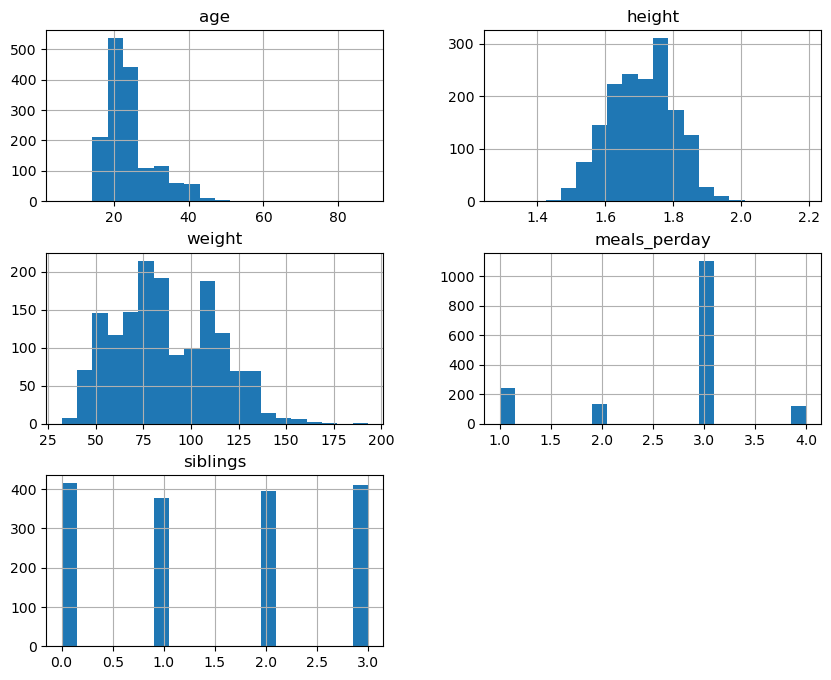

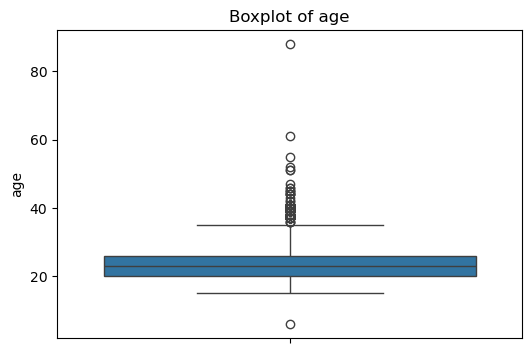

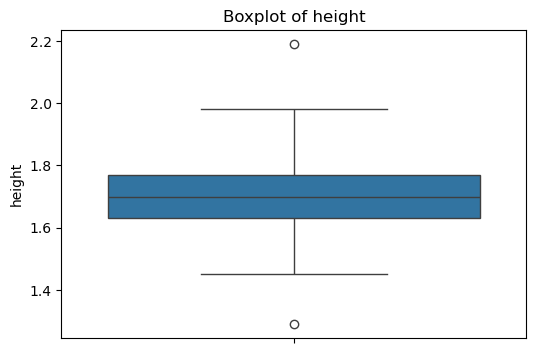

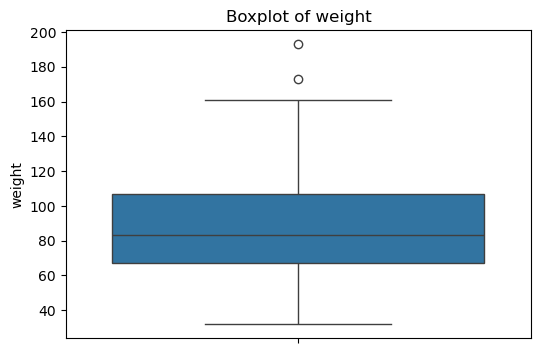

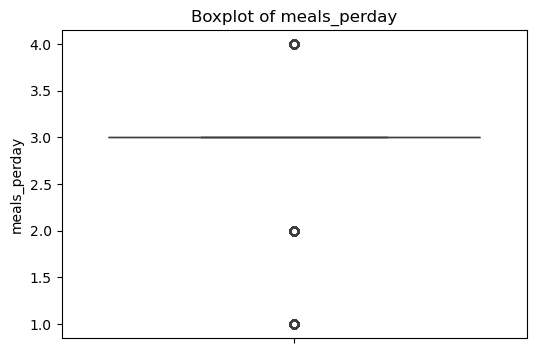

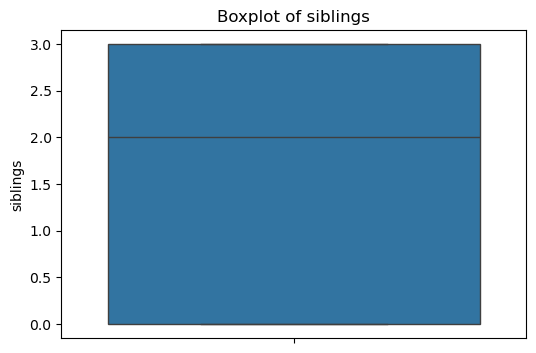

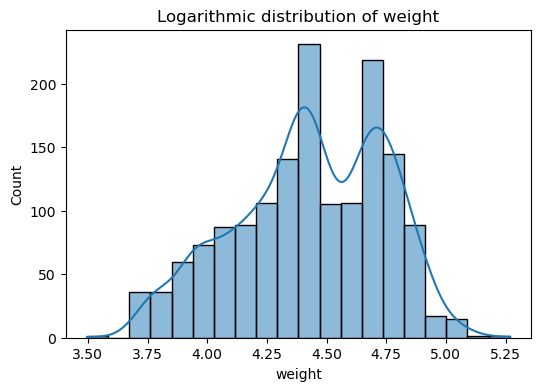

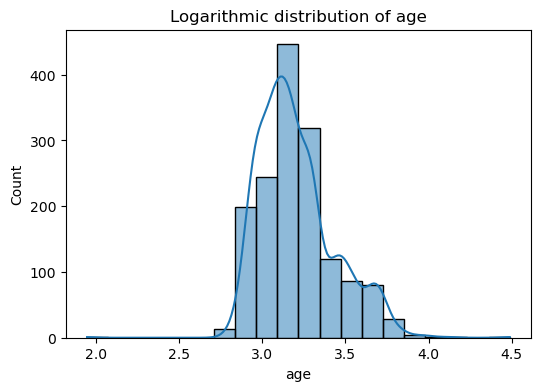

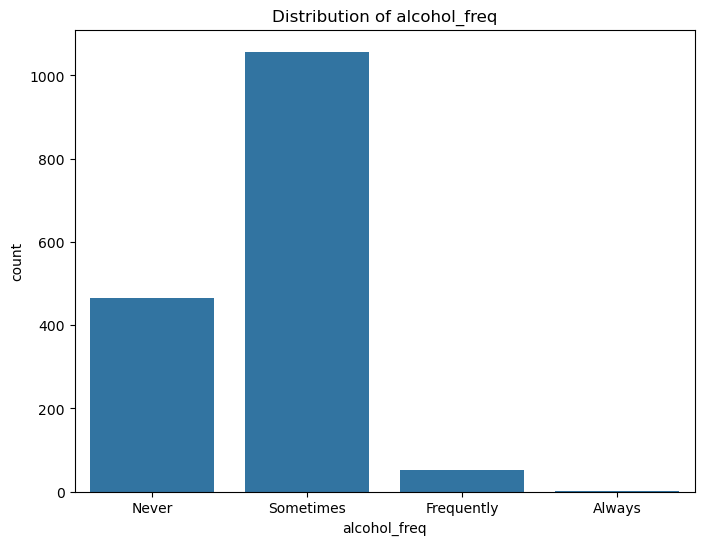

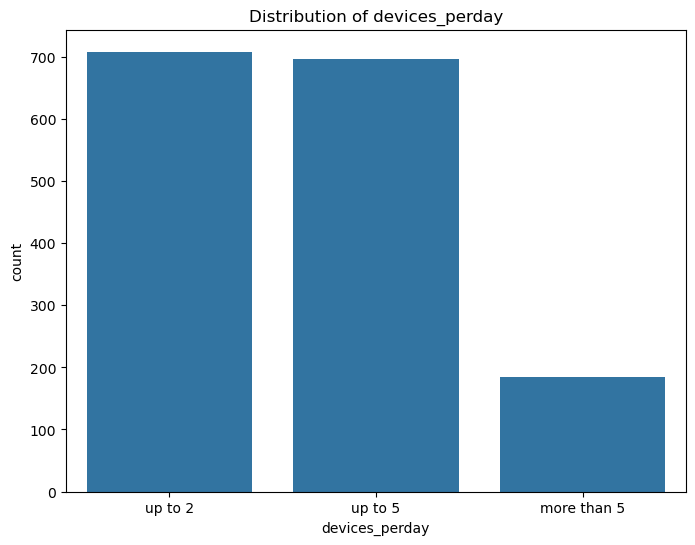

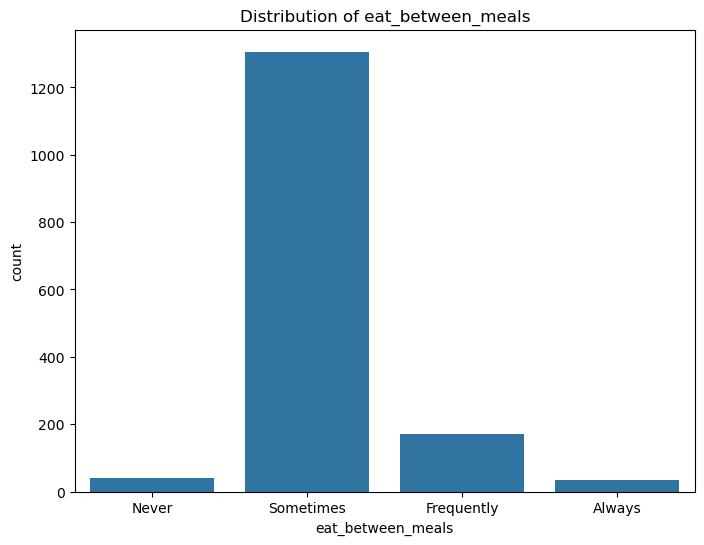

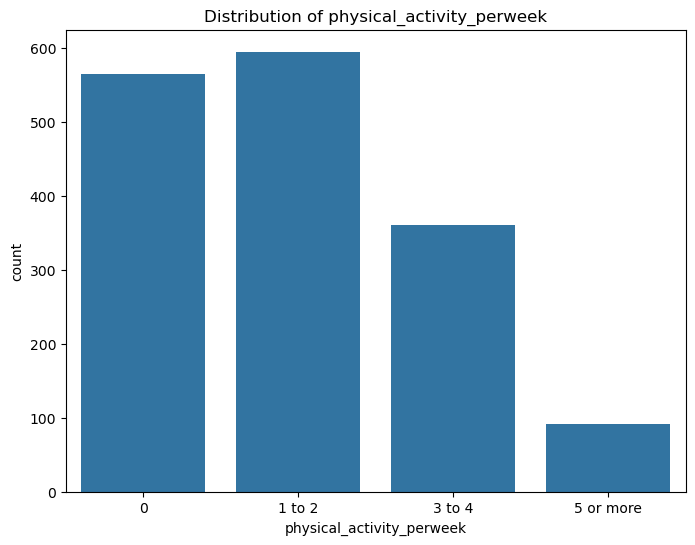

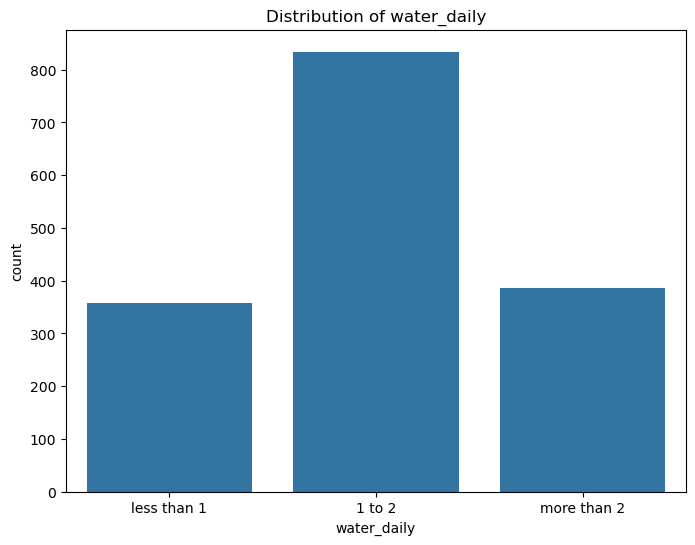

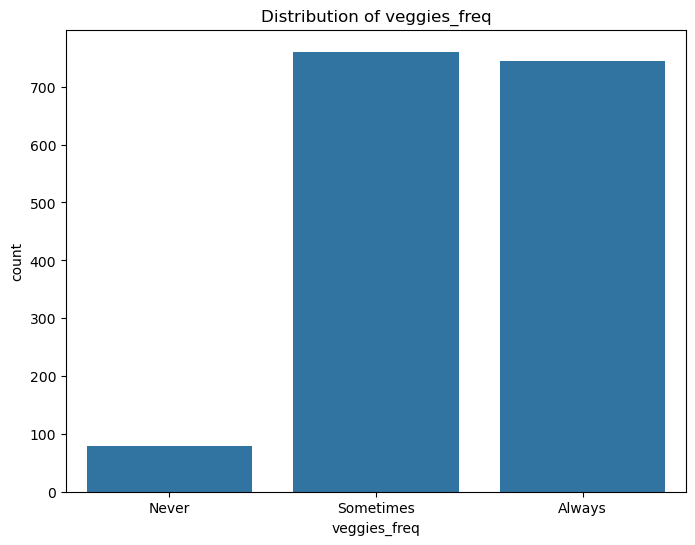

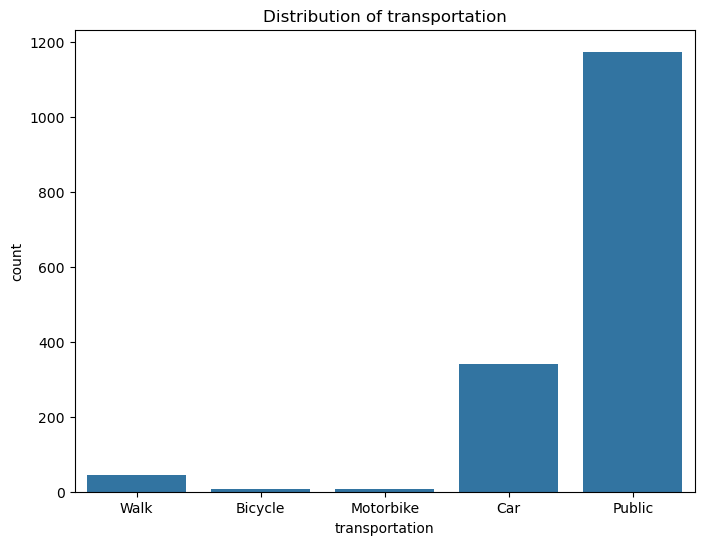

Distribution of boolean variables:
gender
Male      826
Female    765
Name: count, dtype: int64

monitor_calories
no     1501
yes      71
Name: count, dtype: int64

parent_overweight
yes    1309
no      282
Name: count, dtype: int64

smoke
no     1568
yes      31
Name: count, dtype: int64



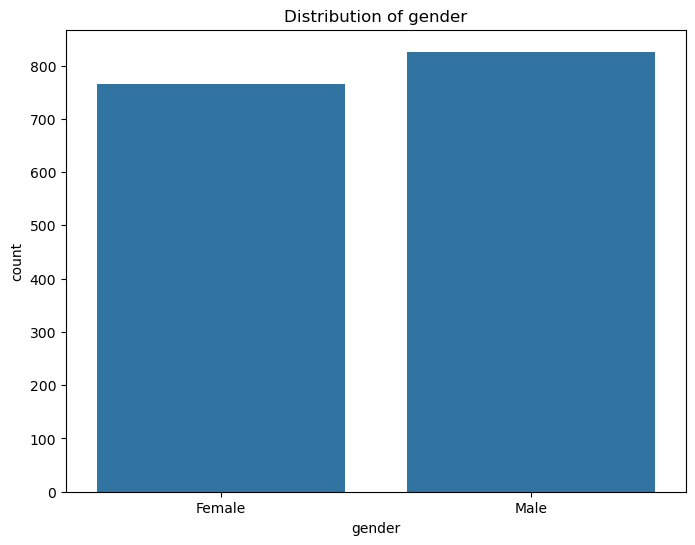

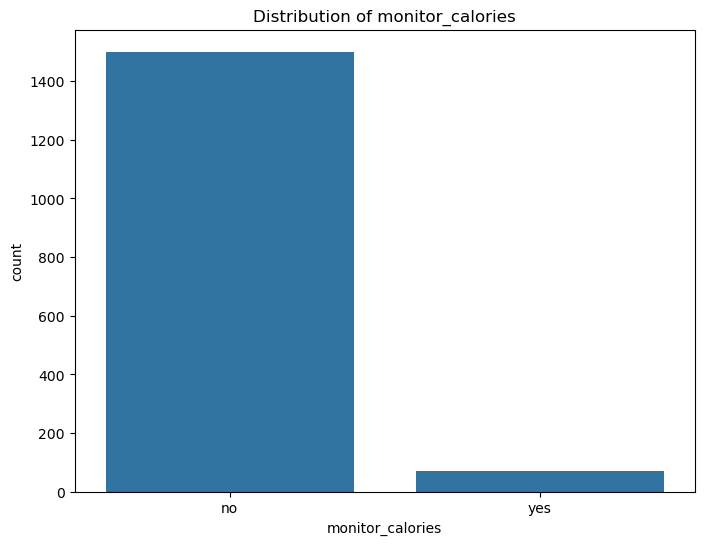

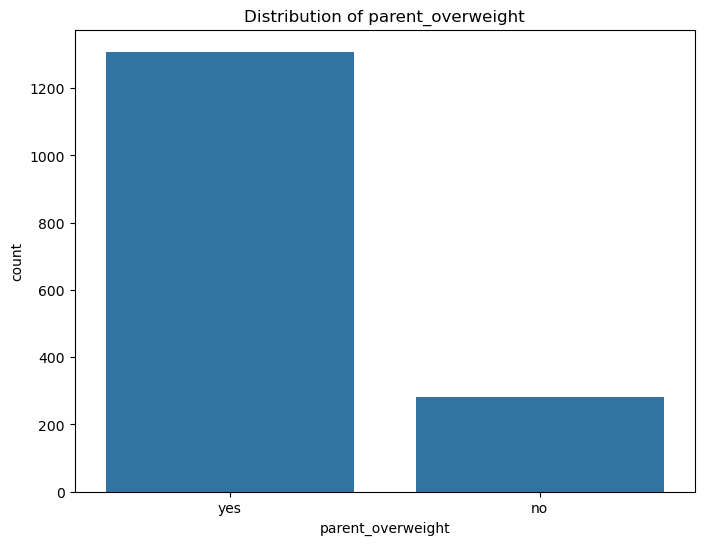

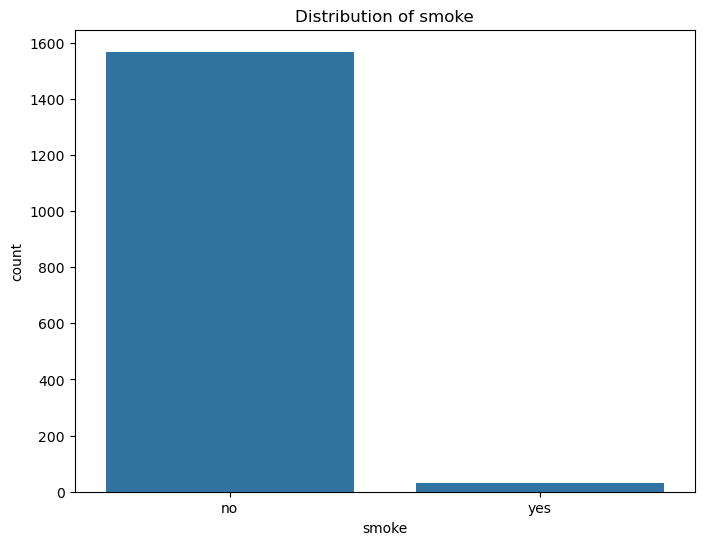

In [7]:
# Removal of the 'marital_status' column as it doesn't contain useful data
train_data.drop(columns=['marrital_status'], inplace=True)

# Handling missing values in 'physical_activity_perweek' as 0 workouts
train_data['physical_activity_perweek'].fillna(0, inplace=True)

# Descriptive statistics for numerical variables
numerical_columns = ['age', 'height', 'weight', 'meals_perday', 'siblings']
print("Descriptive statistics for numerical variables:")
print(train_data[numerical_columns].describe())

# Histograms for numerical variables
train_data[numerical_columns].hist(bins=20, figsize=(10, 8))
plt.show()

# Separate boxplots for each numerical variable
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=train_data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Logarithmic transformation for variables with skewed distribution (optional)
log_transform_columns = ['weight', 'age']  # Example of variables to transform

for column in log_transform_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(np.log1p(train_data[column]), bins=20, kde=True)
    plt.title(f'Logarithmic distribution of {column}')
    plt.show()

# Ordering of categories for categorical variables
alcohol_order = ['Never', 'Sometimes', 'Frequently', 'Always']
devices_order = ['up to 2', 'up to 5', 'more than 5']
eat_between_meals_order = ['Never', 'Sometimes', 'Frequently', 'Always']
physical_activity_order = [0, '1 to 2', '3 to 4', '5 or more']
water_daily_order = ['less than 1', '1 to 2', 'more than 2']
veggies_order = ['Never', 'Sometimes', 'Always']
transportation_order = ['Walk', 'Bicycle', 'Motorbike', 'Car', 'Public']

# Countplot for categorical variables (ordered)
plt.figure(figsize=(8, 6))
sns.countplot(x='alcohol_freq', data=train_data, order=alcohol_order)
plt.title('Distribution of alcohol_freq')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='devices_perday', data=train_data, order=devices_order)
plt.title('Distribution of devices_perday')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='eat_between_meals', data=train_data, order=eat_between_meals_order)
plt.title('Distribution of eat_between_meals')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='physical_activity_perweek', data=train_data, order=physical_activity_order)
plt.title('Distribution of physical_activity_perweek')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='water_daily', data=train_data, order=water_daily_order)
plt.title('Distribution of water_daily')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='veggies_freq', data=train_data, order=veggies_order)
plt.title('Distribution of veggies_freq')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='transportation', data=train_data, order=transportation_order)
plt.title('Distribution of transportation')
plt.show()

# Statistics for boolean variables
boolean_columns = ['gender', 'monitor_calories', 'parent_overweight', 'smoke']

print("Distribution of boolean variables:")
for column in boolean_columns:
    print(train_data[column].value_counts())
    print()

# Countplot for boolean variables
for column in boolean_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=train_data)
    plt.title(f'Distribution of {column}')
    plt.show()



Chi-squared test between alcohol_freq and devices_perday:
Chi-squared statistic = 28.67, p-value = 0.0001

Chi-squared test between alcohol_freq and eat_between_meals:
Chi-squared statistic = 46.42, p-value = 0.0000

Chi-squared test between alcohol_freq and physical_activity_perweek:
Chi-squared statistic = 52.37, p-value = 0.0000

Chi-squared test between alcohol_freq and water_daily:
Chi-squared statistic = 19.67, p-value = 0.0032

Chi-squared test between alcohol_freq and veggies_freq:
Chi-squared statistic = 19.63, p-value = 0.0032

Chi-squared test between alcohol_freq and transportation:
Chi-squared statistic = 56.20, p-value = 0.0000

Chi-squared test between devices_perday and eat_between_meals:
Chi-squared statistic = 38.75, p-value = 0.0000

Chi-squared test between devices_perday and physical_activity_perweek:
Chi-squared statistic = 24.90, p-value = 0.0004

Chi-squared test between devices_perday and water_daily:
Chi-squared statistic = 5.70, p-value = 0.2228

Chi-squared 

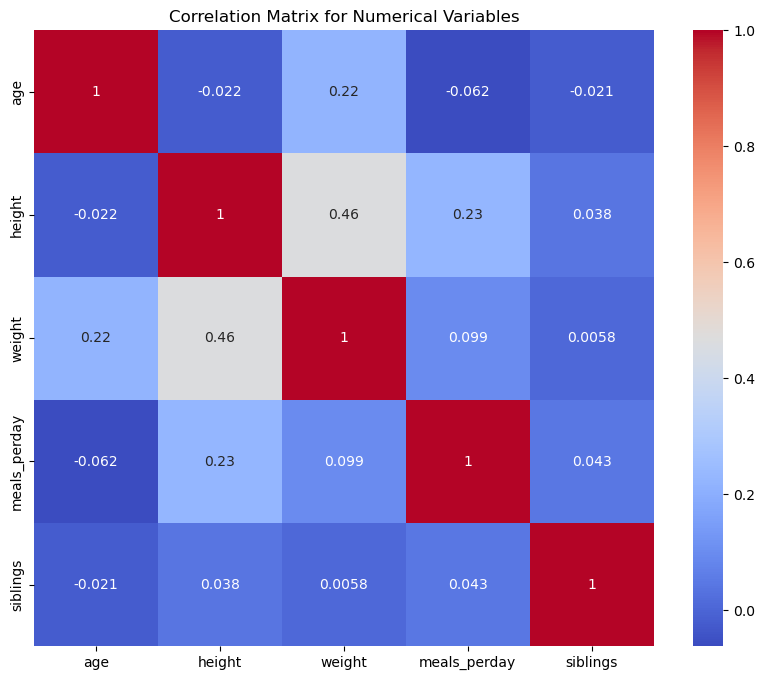

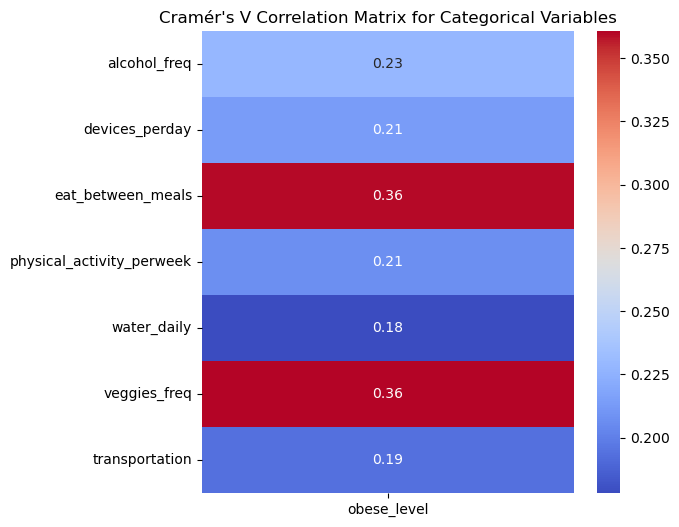

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, f_oneway
import statsmodels.api as sm

# Function to perform chi-squared test between categorical variables
def chi_square_test(cat_var1, cat_var2):
    contingency_table = pd.crosstab(train_data[cat_var1], train_data[cat_var2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-squared test between {cat_var1} and {cat_var2}:")
    print(f"Chi-squared statistic = {chi2:.2f}, p-value = {p:.4f}\n")

# List of categorical columns
categorical_columns = ['alcohol_freq', 'devices_perday', 'eat_between_meals', 
                       'physical_activity_perweek', 'water_daily', 'veggies_freq', 
                       'transportation']

# Perform chi-squared test between all pairs of categorical variables
for i in range(len(categorical_columns)):
    for j in range(i+1, len(categorical_columns)):
        chi_square_test(categorical_columns[i], categorical_columns[j])

# Function to perform chi-squared test between categorical variables and the target variable
def chi_square_test(cat_var, target_var):
    contingency_table = pd.crosstab(train_data[cat_var], train_data[target_var])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-squared test between {cat_var} and {target_var}:")
    print(f"Chi-squared statistic = {chi2:.2f}, p-value = {p:.4f}\n")

# Performing chi-squared test between categorical variables and the target variable
categorical_columns = ['alcohol_freq', 'devices_perday', 'eat_between_meals', 'physical_activity_perweek',
                       'water_daily', 'veggies_freq', 'transportation']

for column in categorical_columns:
    chi_square_test(column, 'obese_level')

# Function to calculate Cramér's V for categorical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

# Correlation for categorical variables
categorical_columns = ['alcohol_freq', 'devices_perday', 'eat_between_meals', 'physical_activity_perweek',
                       'water_daily', 'veggies_freq', 'transportation']
target_variable = 'obese_level'  # The name of the target variable

# Calculate Cramér's V for each categorical variable relative to the target variable
for column in categorical_columns:
    cramers_v_value = cramers_v(train_data[column], train_data[target_variable])
    print(f"Cramér's V between {column} and {target_variable}: {cramers_v_value:.2f}")

# ANOVA analysis for numerical variables relative to the target variable
numerical_columns = ['age', 'height', 'weight', 'meals_perday', 'siblings']

for column in numerical_columns:
    groups = [train_data[train_data[target_variable] == category][column].dropna() 
              for category in train_data[target_variable].unique()]
    anova_result = f_oneway(*groups)
    print(f"ANOVA for {column} relative to {target_variable}: F-statistic={anova_result.statistic:.2f}, p-value={anova_result.pvalue:.4f}")

# Heatmap of correlation for numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(train_data[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

# Correlation matrix for categorical variables using Cramér's V
categorical_corr = pd.DataFrame(index=categorical_columns, columns=[target_variable])

for column in categorical_columns:
    categorical_corr.loc[column, target_variable] = cramers_v(train_data[column], train_data[target_variable])

plt.figure(figsize=(6, 6))
sns.heatmap(categorical_corr.astype(float), annot=True, cmap='coolwarm')
plt.title("Cramér's V Correlation Matrix for Categorical Variables")
plt.show()


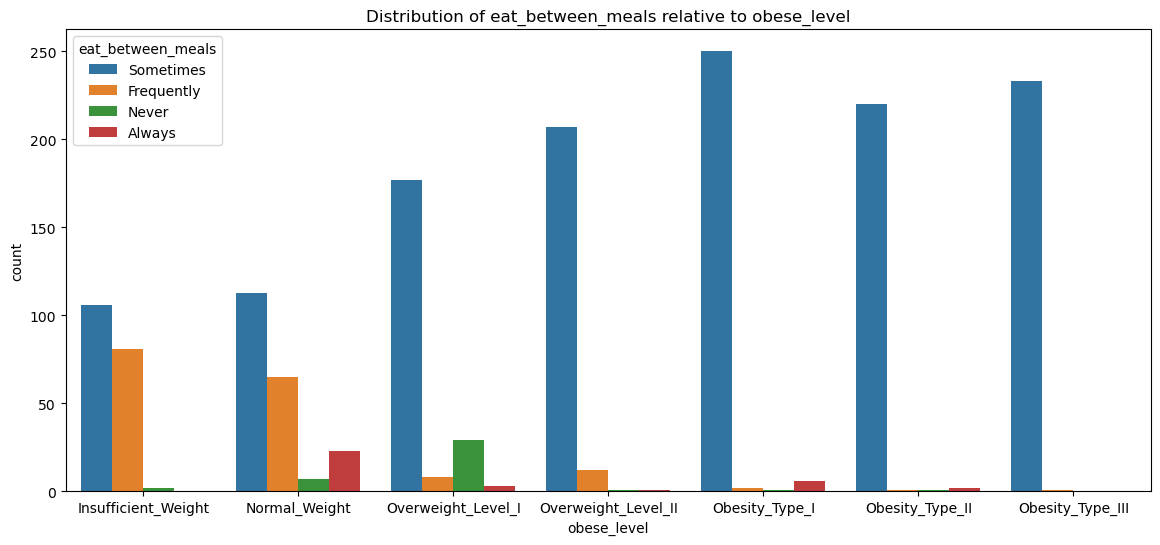

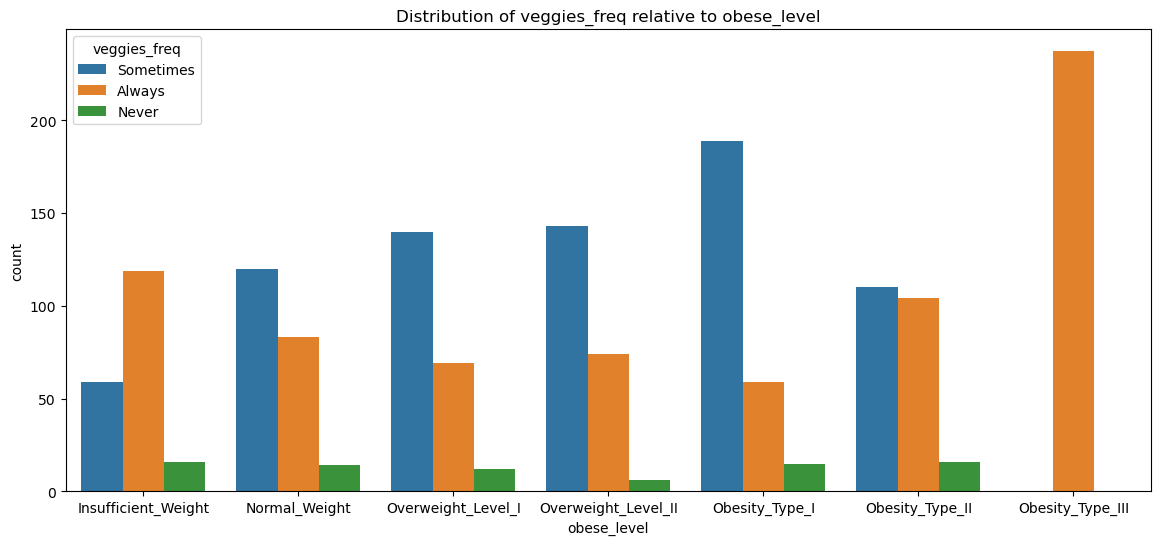

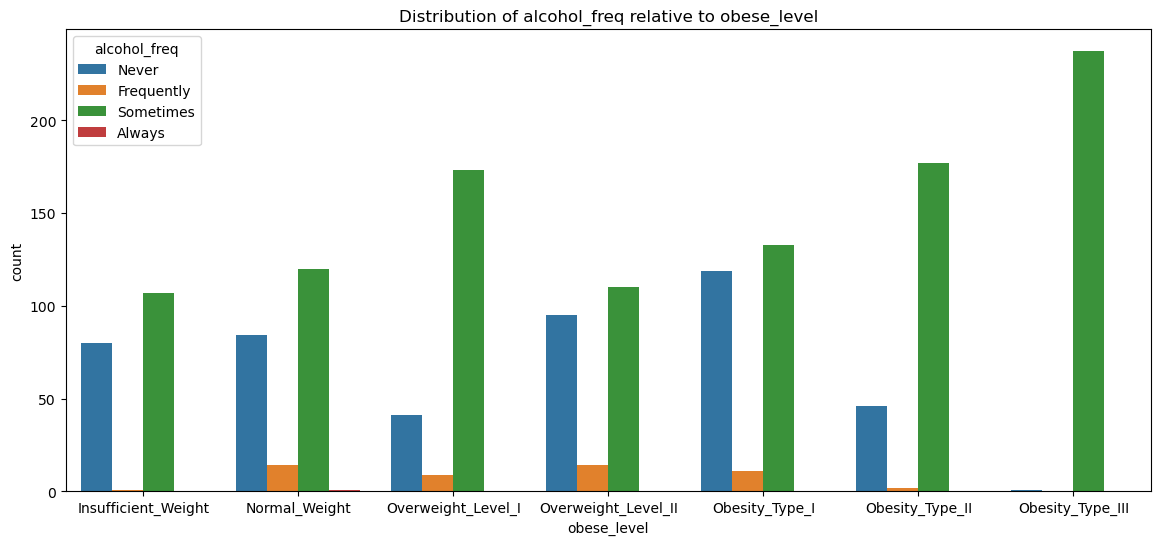

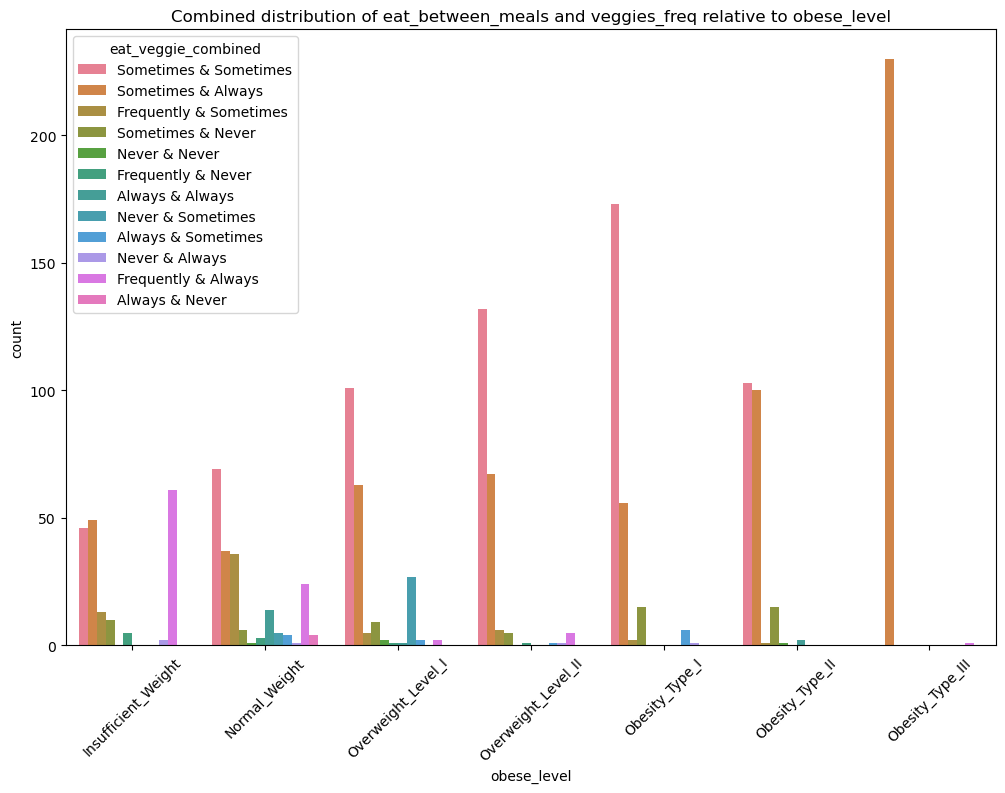

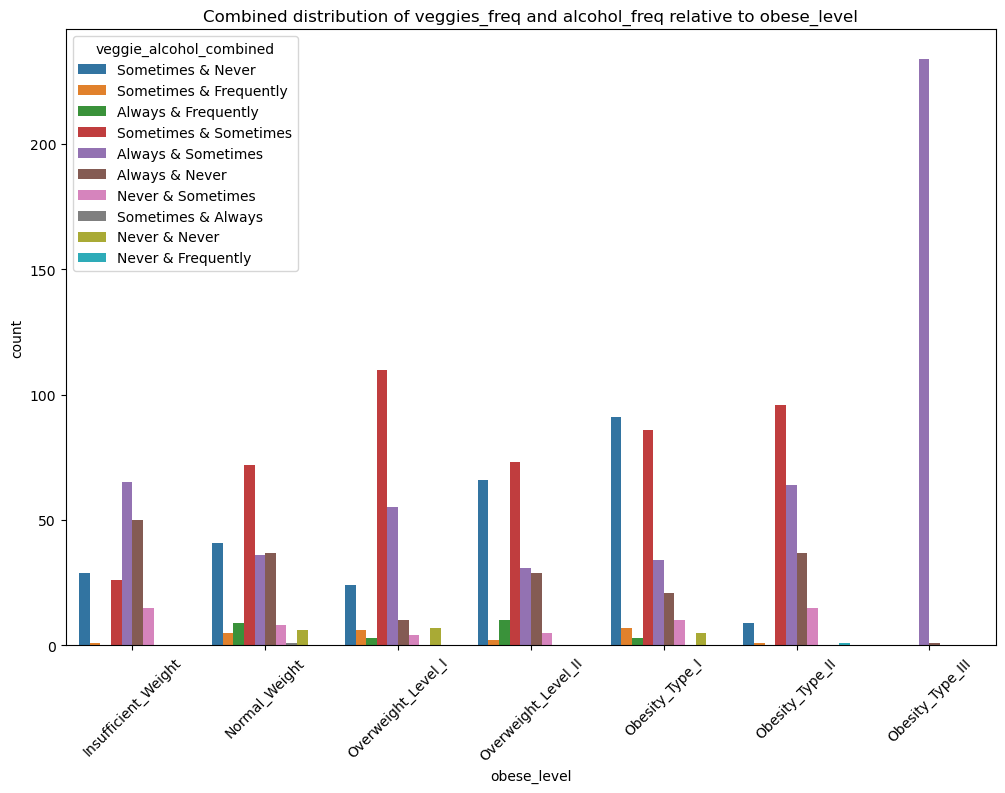

In [9]:
# Order of categories for the target variable 'obese_level'
target_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 
                'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# Bar plot for 'eat_between_meals' relative to 'obese_level'
plt.figure(figsize=(14, 6))
sns.countplot(x='obese_level', hue='eat_between_meals', data=train_data, order=target_order)
plt.title('Distribution of eat_between_meals relative to obese_level')
plt.show()

# Bar plot for 'veggies_freq' relative to 'obese_level'
plt.figure(figsize=(14, 6))
sns.countplot(x='obese_level', hue='veggies_freq', data=train_data, order=target_order)
plt.title('Distribution of veggies_freq relative to obese_level')
plt.show()

# Bar plot for 'alcohol_freq' relative to 'obese_level'
plt.figure(figsize=(14, 6))
sns.countplot(x='obese_level', hue='alcohol_freq', data=train_data, order=target_order)
plt.title('Distribution of alcohol_freq relative to obese_level')
plt.show()

# Create a new combined column with 'alcohol_freq' and 'eat_between_meals'
train_data['alcohol_eat_combined'] = train_data['alcohol_freq'] + ' & ' + train_data['eat_between_meals']

# Order categories for the target variable
target_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 
                'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'] 

# Create a new combined column with 'eat_between_meals' and 'veggies_freq'
train_data['eat_veggie_combined'] = train_data['eat_between_meals'] + ' & ' + train_data['veggies_freq']

# Stacked bar plot for the combination of 'eat_between_meals' and 'veggies_freq'
plt.figure(figsize=(12, 8))
sns.countplot(x='obese_level', hue='eat_veggie_combined', data=train_data, order=target_order)
plt.title('Combined distribution of eat_between_meals and veggies_freq relative to obese_level')
plt.xticks(rotation=45)
plt.show()

# Create a new combined column with 'veggies_freq' and 'alcohol_freq'
train_data['veggie_alcohol_combined'] = train_data['veggies_freq'] + ' & ' + train_data['alcohol_freq']

# Stacked bar plot for the combination of 'veggies_freq' and 'alcohol_freq'
plt.figure(figsize=(12, 8))
sns.countplot(x='obese_level', hue='veggie_alcohol_combined', data=train_data, order=target_order)
plt.title('Combined distribution of veggies_freq and alcohol_freq relative to obese_level')
plt.xticks(rotation=45)
plt.show()

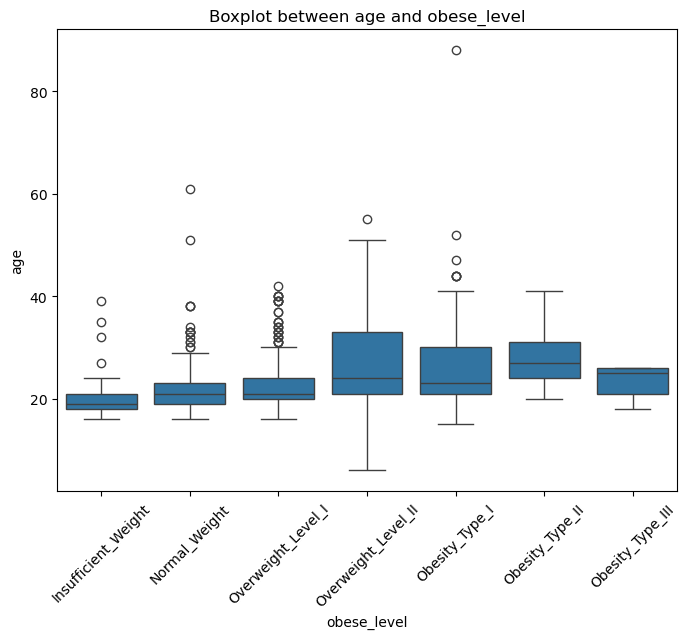

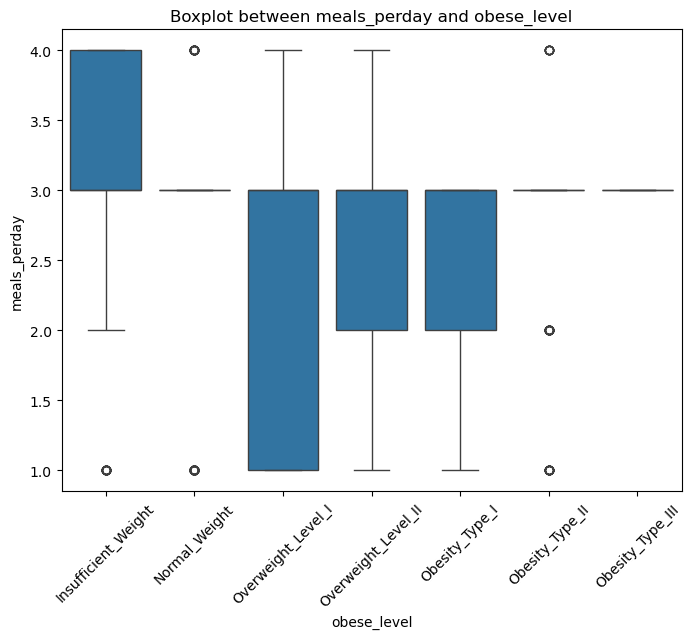

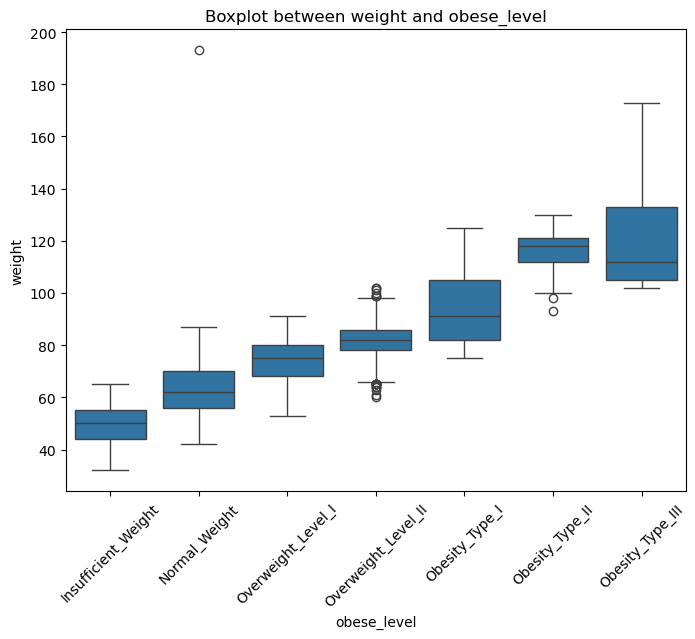

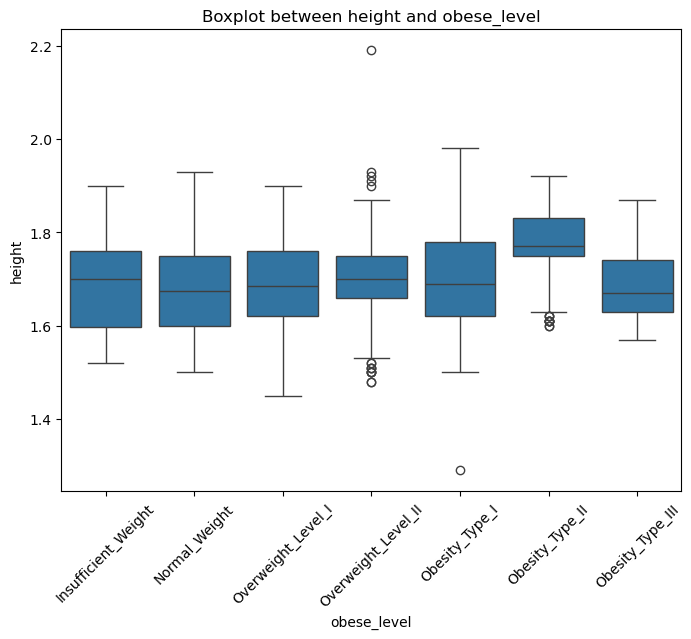

ANOVA for age relative to obese_level:
                      sum_sq      df          F        PR(>F)
C(obese_level)  11293.035864     6.0  54.178865  8.394029e-61
Residual        53430.087760  1538.0        NaN           NaN


ANOVA for meals_perday relative to obese_level:
                    sum_sq      df          F        PR(>F)
C(obese_level)   76.119729     6.0  20.356127  4.646234e-23
Residual        994.057549  1595.0        NaN           NaN


ANOVA for weight relative to obese_level:
                       sum_sq      df            F  PR(>F)
C(obese_level)  878371.382206     6.0  1261.259173     0.0
Residual        180025.649887  1551.0          NaN     NaN


ANOVA for height relative to obese_level:
                   sum_sq      df          F        PR(>F)
C(obese_level)   1.503816     6.0  30.484369  8.778998e-35
Residual        13.072638  1590.0        NaN           NaN




In [10]:
# List of numerical variables
numerical_columns = ['age', 'meals_perday', 'weight', 'height']

# Boxplot for each numerical variable relative to 'obese_level'
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='obese_level', y=column, data=train_data, order=target_order)
    plt.title(f'Boxplot between {column} and obese_level')
    plt.xticks(rotation=45)
    plt.show()

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Function to perform ANOVA test
def anova_test(numerical_var, target_var='obese_level'):
    model = ols(f'{numerical_var} ~ C({target_var})', data=train_data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"ANOVA for {numerical_var} relative to {target_var}:")
    print(anova_table)
    print("\n")

# Perform ANOVA test for numerical variables
for column in numerical_columns:
    anova_test(column)



<a class="anchor" id="">

# 3. Modify data (Data preparation)

</a>

<img src="image/step3.png" style="height:60px">

Use this section to apply transformations to your dataset.

Remember that your decisions at this step should be exclusively informed by your **training data**. While you will need to split your data between training and validation, how that split will be made and how to apply the approppriate transformations will depend on the type of model assessment solution you select for your project (each has its own set of advantages and disadvantages that you need to consider). **Please find a list of possible methods for model assessment below**: 

1. **Holdout method**
2. **Repeated Holdout method**
3. **Cross-Validation**

__Note:__ Instead of creating different sections for the treatment of training and validation data, you can make the transformations in the same cell. There is no need to create a specific section for that. 

### 3.1. Data Preparation 

### 3.2. Feature Engineering

### 3.3. Scaling

### 3.4. Feature Selection

<a class="anchor" id="">

# 4 & 5. Model & Assess (Modelling and Assessment)

</a>

<img src="image/step4.png" style="height:60px">

### 4.1. Model Selection

In this section you should take the time to train different predictive algorithms with the data that got to this stage and **use the approppriate model assessment metrics to decide which model you think is the best to address your problem**.

**You are expected to present on your report the model performances of the different algorithms that you tested and discuss what informed your choice for a specific algorithm**

### 4.2. Model Optimization

After selecting the best algorithm (set of algorithms), you can try to optimize the performance of your model by fiddling with the algorithms' hyper-parameters and select the options that result on the best overall performance.

Possible ways of doing this can be through:
1. [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
2. [RandomSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

**While you are not required to show the results of all combinations of hyperparameters that you tried, you should at least discuss the what were the possible combinations used and which of them resulted in your best performance**

<a class="anchor" id="">

# 5. Deploy

</a>

<img src="image/step5.png" style="height:60px">

### 5.0 Training a final model

You used the previous steps of modelling and assessment to determine what would be best strategies when it comes to preprocessing, scaling, feature selection, algorithm and hyper-parameters you could find. 

**By this stage, all of those choices were already made**. For that reason, a split between training and validation is no longer necessary. **A good practice** would be to take the initial data and train a final model with all of the labeled data that you have available.

**Everything is figured by this stage**, so, on a first level all you need to do is replicate the exact preprocessing, scaling and feature selection decisions you made before.<br>
When it comes to the final model, all you have to do is creeate a new instance of your best algorithm with the best parameters that you uncovered (no need to try all algorithms and hyper-parameters again).

### 5.1. Import and Transform your test data

Remember, the test data does not have the `outcome` variable.

### 5.2. Obtain Predictions on the test data from your final model

### 5.3. Create a Dataframe containing the index of each row and its intended prediction and export it to a csv file

Submit the csv file to Kaggle to obtain the model performance of your model on the test data.